# Visualizing Active Recovery Chat with DeepSeek

In [4]:
%load_ext autoreload
%autoreload 2

In [21]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

In [17]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [20]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## 0. Read in the Text File

In [1]:
with open("active_recovery.txt", "r", encoding="utf-8") as f:
    text = f.read().lower()

## 1. Find Active Recovery Protocols 

using N-grams + filter for Nouns

### Prepare the Text

In [ ]:
# Lowercase
text = text.lower()

# Remove punctuation
text = text.translate(str.maketrans("", "", string.punctuation))

# Tokenize
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word not in stop_words]

lemmatizer = WordNetLemmatizer()
final_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# I want to grab the nouns that are most common in the text
tagged_tokens = nltk.pos_tag(tokens)
nouns = [word for word, pos in tagged_tokens if pos.startswith('NN')]

### Visualize the Nouns

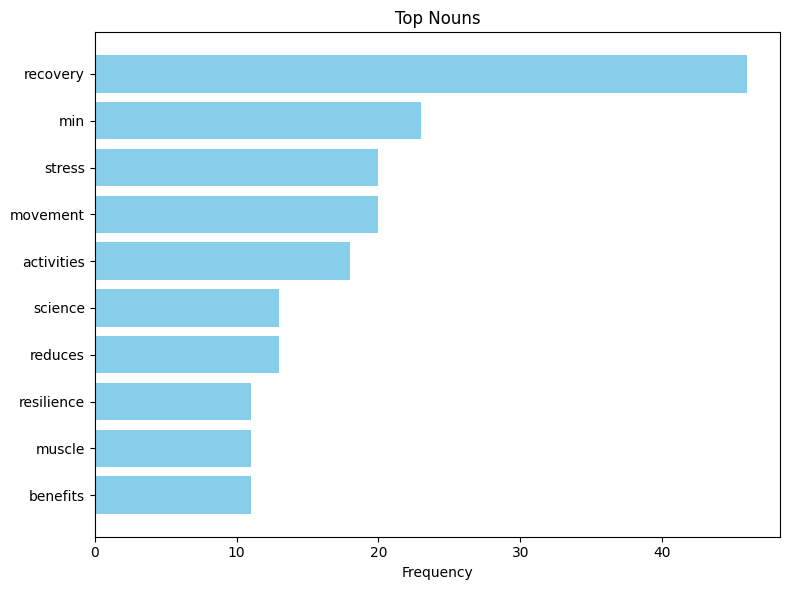

In [22]:
# 4. Count frequencies
noun_counts = Counter(nouns)
top_nouns = noun_counts.most_common(10)

# 5. Prepare data for plotting
labels, counts = zip(*top_nouns)


# 6. Plot
plt.figure(figsize=(8,6))
plt.barh(labels[::-1], counts[::-1], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top Nouns')
plt.tight_layout()
plt.show()

Hmm how do I find the actual activities?

### Verb + Noun Pairs

Ex.) take ice bath, get massage

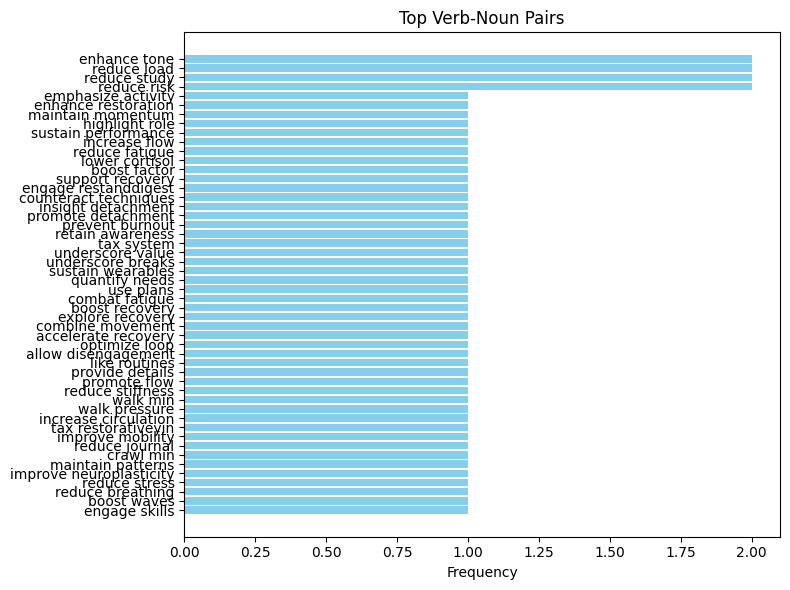

In [25]:
# Load small English model
nlp = spacy.load("en_core_web_sm")

# Process text
doc = nlp(text)

verb_noun_pairs = []

for token in doc:
    if token.pos_ == "VERB":
        for child in token.children:
            if child.dep_ == "dobj" and child.pos_ in ["NOUN", "PROPN"]:
                verb = token.lemma_      # Use base form of verb
                noun = child.text.lower()  # Normalize noun
                verb_noun_pairs.append((verb, noun))

# Count frequency
pair_counts = Counter(verb_noun_pairs)


# 4. Count frequencies
top_pairs = pair_counts.most_common(50)

# 5. Prepare data for plotting
labels, counts = zip(*top_pairs)
labels = [f"{verb} {noun}" for verb, noun in labels]  # Convert tuple to string

# 6. Plot
plt.figure(figsize=(8,6))
plt.barh(labels[::-1], counts[::-1], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top Verb-Noun Pairs')
plt.tight_layout()
plt.show()

Hey I found all the benefits at least.

But how do I find the active recovery protocols? Should I just use fuzzymatching? 